#**TRACK 1**


## Setting up!

In [1]:
# Step 1: Authenticate your Google Account
from google.colab import auth
auth.authenticate_user()

# Step 2: Set your GCP Project ID
project_id = "booming-cascade-456205-t6"  # Replace with your actual project ID

# Step 3: Initialize BigQuery Client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from google.colab import drive
import os
import pandas as pd


# Mount Google Drive
drive.mount('/content/drive')

# Create project folder
drive_folder = "/content/drive/MyDrive/ecommerce_analysis"
os.makedirs(drive_folder, exist_ok=True)


Mounted at /content/drive


## 1. 📊Website Activity

### 1.1. Top Visited URIs

In [ ]:
query = """SELECT uri, COUNT(*) AS visits
        FROM `bigquery-public-data.thelook_ecommerce.events`
        GROUP BY uri
        ORDER BY visits DESC
        LIMIT 10"""
df = client.query(query).to_dataframe()
df.to_csv(f"/content/drive/MyDrive/ecommerce_analysis/top_visited_uris.csv", index=False)
df.head()


,uri,visits
0,/cart,591303
1,/purchase,180896
2,/cancel,124559
3,/home,87956
4,/department/women/category/maternity/brand/mot...,3368


### 1.2. Top Traffic Sources

In [ ]:
query = """SELECT traffic_source, COUNT(*) AS sessions
        FROM `bigquery-public-data.thelook_ecommerce.events`
        GROUP BY traffic_source
        ORDER BY sessions DESC"""
df = client.query(query).to_dataframe()
df.to_csv(f"/content/drive/MyDrive/ecommerce_analysis/traffic_sources.csv", index=False)
df.head()


,traffic_source,sessions
0,Email,1086920
1,Adwords,728717
2,YouTube,242310
3,Facebook,241415
4,Organic,119713


### 1.3. Sessions Over Time

In [ ]:
query = """
SELECT FORMAT_TIMESTAMP('%Y-%m', created_at) AS month, COUNT(DISTINCT session_id) AS sessions
FROM `bigquery-public-data.thelook_ecommerce.events`
GROUP BY month
ORDER BY month
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/website_sessions_over_time.csv", index=False)
df.head()

,month,sessions
0,2019-01,6529
1,2019-02,6077
2,2019-03,6947
3,2019-04,6655
4,2019-05,6790


### 1.4 User Location

In [ ]:
query = """
SELECT u.country, COUNT(e.id) AS sessions
FROM `bigquery-public-data.thelook_ecommerce.events` e
JOIN `bigquery-public-data.thelook_ecommerce.users` u ON e.user_id = u.id
GROUP BY u.country
ORDER BY sessions DESC
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/website_sessions_by_country.csv", index=False)
df.head()

,country,sessions
0,China,440999
1,United States,290920
2,Brasil,186120
3,South Korea,70242
4,United Kingdom,60118


### 1.5 Browser Usage

In [ ]:
query = """
SELECT browser, COUNT(*) AS visits
FROM `bigquery-public-data.thelook_ecommerce.events`
GROUP BY browser
ORDER BY visits DESC
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/website_browser_usage.csv", index=False)
df.head()

,browser,visits
0,Chrome,1210510
1,Firefox,483915
2,Safari,482977
3,IE,122017
4,Other,119656


## 2. 👥Demographic Composition Dashboard

### 2.1 Age vs. Gender Distribution

In [ ]:
query = """SELECT age, gender, COUNT(*) AS users
        FROM `bigquery-public-data.thelook_ecommerce.users`
        GROUP BY age, gender
        ORDER BY age"""
df = client.query(query).to_dataframe()
df.to_csv(f"/content/drive/MyDrive/ecommerce_analysis/age_gender_distribution.csv", index=False)
df.head()


,age,gender,users
0,12,F,873
1,12,M,818
2,13,F,830
3,13,M,810
4,14,M,870


### 2.2 Top Cities by User Count

In [ ]:
query = """
SELECT city, COUNT(*) AS user_count
FROM `bigquery-public-data.thelook_ecommerce.users`
WHERE city IS NOT null
GROUP BY city
ORDER BY user_count DESC
LIMIT 10
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/demographics_top_cities.csv", index=False)
df.head()


,city,user_count
0,Shanghai,2461
1,Beijing,2082
2,Seoul,1432
3,Shenzhen,1330
4,null,958


### 2.3 Loyal Customers (Repeat Buyers)

In [ ]:
query = """
SELECT u.first_name, u.last_name, o.user_id, COUNT(DISTINCT o.order_id) AS num_orders
FROM `bigquery-public-data.thelook_ecommerce.orders` o
JOIN `bigquery-public-data.thelook_ecommerce.users` u ON o.user_id = u.id
GROUP BY u.first_name, u.last_name, o.user_id
HAVING num_orders > 1
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/demographics_loyal_customers.csv", index=False)
df.head()


,first_name,last_name,user_id,num_orders
0,Jennifer,Taylor,166,2
1,Miranda,Alvarado,213,2
2,Erin,Mccoy,258,2
3,Heather,Kelley,317,2
4,Tammy,Gallagher,327,2


### 2.4 Orders by Gender

In [ ]:
query = """
SELECT gender, COUNT(*) AS total_orders
FROM `bigquery-public-data.thelook_ecommerce.orders`
GROUP BY gender
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/demographics_orders_by_gender.csv", index=False)
df.head()


,gender,total_orders
0,F,62698
1,M,62464


### 2.5 Total Spend by Age

In [ ]:
query = """
SELECT u.age, SUM(oi.sale_price) AS total_spent
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.users` u ON oi.user_id = u.id
GROUP BY u.age
ORDER BY u.age
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/demographics_spend_by_age.csv", index=False)
df.head()

,age,total_spent
0,12,184908.950229
1,13,175885.210222
2,14,188417.250204
3,15,183415.810149
4,16,180222.410136


## 3. 🛍️Product Performance Dashboard

### 3.1 Top Selling Products

In [ ]:
query = """SELECT p.name, COUNT(*) AS units_sold
        FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
        JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
        GROUP BY p.name
        ORDER BY units_sold DESC
        LIMIT 10"""
df = client.query(query).to_dataframe()
df.to_csv(f"/content/drive/MyDrive/ecommerce_analysis/top_selling_products.csv", index=False)
df.head()


,name,units_sold
0,Wrangler Men's Premium Performance Cowboy Cut ...,67
1,Puma Men's Socks,40
2,7 For All Mankind Men's Standard Classic Strai...,38
3,True Religion Men's Ricky Straight Jean,36
4,Thorlo Unisex Experia Running Sock,36


### 3.2 Revenue by Product Category

In [ ]:
query = """
SELECT p.name AS product_name, SUM(oi.sale_price) AS total_revenue
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
GROUP BY product_name
ORDER BY total_revenue DESC
LIMIT 10
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/products_top_revenue.csv", index=False)
df.head()

,product_name,total_revenue
0,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,20769.0
1,The North Face Apex Bionic Soft Shell Jacket -...,17157.0
2,The North Face Nuptse 2 Jacket Deep Water Blue...,11739.0
3,The North Face Apex Bionic Jacket - Men's,11739.0
4,Canada Goose Women's Mystique,11250.0


### 3.3 Category Revenue by Gender

In [ ]:
query = """
SELECT p.category, o.gender, SUM(oi.sale_price) AS revenue
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.orders` o ON oi.order_id = o.order_id
JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
GROUP BY p.category, o.gender
ORDER BY revenue DESC
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/products_category_gender_revenue.csv", index=False)
df.head()

,category,gender,revenue
0,Outerwear & Coats,M,854629.118807
1,Jeans,M,766627.420343
2,Suits & Sport Coats,M,640280.649470
3,Sweaters,M,535532.960245
4,Jeans,F,477295.711363


### 3.4 Product Performance by Age Group

In [ ]:
query = """
SELECT u.age, p.category, SUM(oi.sale_price) AS total_sales
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.users` u ON oi.user_id = u.id
JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
GROUP BY u.age, p.category
ORDER BY u.age
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/products_age_group_sales.csv", index=False)
df.head()

,age,category,total_sales
0,12,Accessories,6757.009994
1,12,Socks & Hosiery,1212.290005
2,12,Intimates,7799.880036
3,12,Socks,1670.379998
4,12,Shorts,7407.330013


### 3.5 Profit Margin by Product

In [ ]:
query = """
SELECT p.name AS product_name, SUM(oi.sale_price - p.cost) AS total_profit
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
GROUP BY product_name
ORDER BY total_profit DESC
LIMIT 10
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/products_top_profit.csv", index=False)
df.head()

,product_name,total_profit
0,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,10247.244008
1,The North Face Apex Bionic Soft Shell Jacket -...,8983.946972
2,The North Face Nuptse 2 Jacket Deep Water Blue...,6961.226982
3,Canada Goose Women's Mystique,6678.749991
4,The North Face Apex Bionic Jacket - Men's,6550.361983


## 4. 🏬Inventory Status Dashboard

### 4.1 Products Low in Stock

In [ ]:
query = """
SELECT product_name, COUNT(*) AS stock
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
WHERE sold_at IS NULL
GROUP BY product_name
ORDER BY stock ASC
LIMIT 10
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/inventory_low_stock.csv", index=False)
df.head()

,product_name,stock
0,Champion 9 oz. 50/50 EcoSmart Open-Bottom Pant...,1
1,Kipling Brownie Large Organizer Wallet,1
2,Pro-CottonÂ® Fleece Full Zip Hood,1
3,Icebreaker Women's BF 200 Legging,1
4,Knitted Beanie Crochet Winter Hat with Elegant...,1


### 4.2 Stock Availability by Category

In [ ]:
query = """
SELECT product_category, COUNT(*) AS stock_available
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
WHERE sold_at IS NULL
GROUP BY product_category
ORDER BY stock_available DESC
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/inventory_stock_by_category.csv", index=False)
df.head()

,product_category,stock_available
0,Intimates,22506
1,Jeans,21460
2,Tops & Tees,20539
3,Fashion Hoodies & Sweatshirts,19775
4,Swim,19255


### 4.3 Stock by Distribution Center

In [ ]:
query = """
SELECT d.name AS center_name, COUNT(i.id) AS available_stock
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` i
JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` d
ON i.product_distribution_center_id = d.id
WHERE i.sold_at IS NULL
GROUP BY center_name
ORDER BY available_stock DESC
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/inventory_stock_by_center.csv", index=False)
df.head()

,center_name,available_stock
0,Chicago IL,40529
1,Memphis TN,40423
2,Houston TX,38503
3,Mobile AL,30759
4,Los Angeles CA,29557


### 4.4 Stock Turnover Rate (Sold vs Available)

In [ ]:
query = """
SELECT product_name,
  COUNTIF(sold_at IS NOT NULL) AS sold,
  COUNTIF(sold_at IS NULL) AS available,
  SAFE_DIVIDE(COUNTIF(sold_at IS NOT NULL), COUNT(*)) AS turnover_rate
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
GROUP BY product_name
ORDER BY turnover_rate DESC
LIMIT 10
"""
df = client.query(query).to_dataframe()
df.to_csv("/content/drive/MyDrive/ecommerce_analysis/inventory_turnover_rate.csv", index=False)
df.head()

,product_name,sold,available,turnover_rate
0,Beige Knit Solid Color Circle Eternity Ring Scarf,4,4,0.5
1,Black & Silver Double Grommet Holes Belt,2,2,0.5
2,Domo Men's Plush Wallet,2,2,0.5
3,Dockers Men's Bridle Belt,3,3,0.5
4,Carhartt Women's Dearborn Belt,3,3,0.5


## 🔮 Predictive Analysis

### Linear Regression: Predict Age Based on Product Category

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import r2_score


query = """
SELECT u.age,
       u.gender,
       u.country,
       u.traffic_source,
       COUNT(DISTINCT o.order_id) AS total_orders,
       COUNT(DISTINCT oi.product_id) AS unique_products,
       COUNT(oi.id) AS total_items,
       SUM(oi.sale_price) AS total_spent,
       AVG(oi.sale_price) AS avg_sale_price,
       COUNT(DISTINCT p.department) AS num_departments,
       COUNT(DISTINCT p.category) AS num_categories,
       EXTRACT(HOUR FROM o.created_at) AS order_hour,
       EXTRACT(DAYOFWEEK FROM o.created_at) AS order_weekday
FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN `bigquery-public-data.thelook_ecommerce.users` u ON oi.user_id = u.id
JOIN `bigquery-public-data.thelook_ecommerce.orders` o ON oi.order_id = o.order_id
JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
GROUP BY u.age, u.gender, u.country, u.traffic_source, order_hour, order_weekday
"""
df = client.query(query).to_dataframe()

# One-hot encode categorical variables
categorical = ['gender', 'country', 'traffic_source']
df_encoded = pd.get_dummies(df, columns=categorical)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
features_to_scale = ['total_orders', 'unique_products', 'total_items', 'total_spent', 'avg_sale_price', 'num_departments', 'num_categories', 'order_hour', 'order_weekday']
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Train linear regression model
from sklearn.linear_model import LinearRegression
X = df_encoded.drop(columns=['age'])
y = df_encoded['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2 * 100:.2f}%")


Linear Regression MAE: 14.69, RMSE: 16.97, R²: -0.00%


It seems that the R² value is negative, which indicates that the linear regression model is not performing well. Therefore, i will try a classification model using Random forest as shown belo

### Random Forest: Predict Age Based on other variables

Classification Accuracy: 18.15%
              precision    recall  f1-score   support

       25-34       0.18      0.18      0.18      2911
       35-44       0.17      0.16      0.16      2908
       45-54       0.17      0.16      0.17      2992
       55-64       0.16      0.15      0.15      2879
         65+       0.10      0.06      0.08      1645
         <25       0.23      0.28      0.25      3757

    accuracy                           0.18     17092
   macro avg       0.17      0.17      0.17     17092
weighted avg       0.18      0.18      0.18     17092



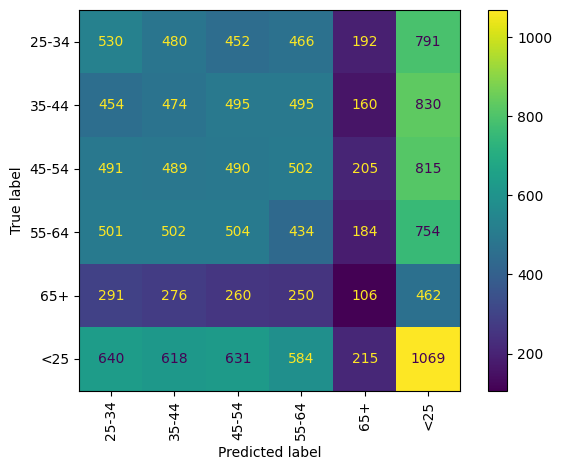

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming the query to get the data is already executed and `df` is the DataFrame
# Binning ages into groups (classification)
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Encode categorical variables
categorical = ['gender', 'country', 'traffic_source']
df_encoded = pd.get_dummies(df.drop(columns=['age']), columns=categorical)

# Standardize numerical features
features_to_scale = ['total_orders', 'unique_products', 'total_items', 'total_spent', 'avg_sale_price', 'num_departments', 'num_categories', 'order_hour', 'order_weekday']
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Classification
X = df_encoded.drop(columns=['age_group'])
y = df_encoded['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"Classification Accuracy: {accuracy:.2f}%")

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, xticks_rotation='vertical')
plt.tight_layout()
plt.show()
